# COVID-19 

----

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

### Requirements

#### Exploratory Data Analysis
* [x] Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* [x] Grouping the data and analyzing the groups - using Pandas aggregate methods.
* [x] Work with features - handle missing data if needed, use pandas date APIs.
* [x] Manipulate datasets - use joins if needed.
* [x] Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* [x] Use at least one statistical significance test.
* [x] Report p-values.
* [x] Use visualizations.

#### Modeling
* [x] Visualize data with dimensionality reduction algorithms.
- [x] Perform cluster analysis.
* [x] Use a linear model to explain relationships by correlation and predict new values.

#### Presentation
* Present the project - the data, methods and results.

#### Evaluation Criteria
- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- [x] Both PCA and T-SNE algorithms are used.


<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

### Getting started

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import math

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [ ]:
patient = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/PatientInfo.csv?token=AFU2SI3MJJRN7U6ASU47T4C72HE2G")
region = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Region.csv?token=AFU2SIYZDGW7DBUX7RYONTS72HGJU")
search_trend = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/SearchTrend.csv?token=AFU2SI6XXFGO6I7ZNW6SAUK72HGHU")
weather = pd.read_csv("https://raw.githubusercontent.com/TuringCollegeSubmissions/lcramw-DS.1.4/master/Weather.csv?token=AFU2SI7TOYZRPM5GX6JMVOC72HGAU")

### EDA

#### Exploring

In [ ]:
patient.shape
patient.head(2)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released


In [ ]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [ ]:
print("first Infected date in korea: ", patient['confirmed_date'][0])

first Infected date in korea:  2020-01-23


In [ ]:
region.shape
region.head(2)

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088


In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


In [ ]:
weather.shape
weather.head(2)

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26271 entries, 0 to 26270
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   26271 non-null  int64  
 1   province               26271 non-null  object 
 2   date                   26271 non-null  object 
 3   avg_temp               26256 non-null  float64
 4   min_temp               26266 non-null  float64
 5   max_temp               26268 non-null  float64
 6   precipitation          26271 non-null  float64
 7   max_wind_speed         26262 non-null  float64
 8   most_wind_direction    26242 non-null  float64
 9   avg_relative_humidity  26251 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
weather.province.value_counts()

Gangwon-do           1642
Daejeon              1642
Gyeongsangnam-do     1642
Jeollabuk-do         1642
Incheon              1642
Jeollanam-do         1642
Daegu                1642
Busan                1642
Ulsan                1642
Gyeongsangbuk-do     1642
Gwangju              1642
Gyeonggi-do          1642
Jeju-do              1642
Seoul                1642
Chungcheongnam-do    1641
Chungcheongbuk-do    1613
Chunghceongbuk-do      29
Name: province, dtype: int64

In [ ]:
weather['province'] = weather['province'].str.replace('Chunghceongbuk', 'Chungcheongbuk')

weather_grouped = weather.groupby(['province']).mean().round(1)
weather_grouped

,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
province,,,,,,,,
Busan,11000,15.2,11.9,19.4,1.9,6.4,186.2,62.8
Chungcheongbuk-do,40000,12.1,6.5,18.4,1.3,3.9,149.3,65.0
Chungcheongnam-do,41000,12.3,7.3,17.8,1.2,4.8,192.7,75.3
Daegu,12000,14.3,9.4,19.8,1.3,5.0,208.8,60.3
Daejeon,15000,13.5,8.7,19.0,1.6,3.9,238.4,68.4
Gangwon-do,30000,13.9,9.9,18.3,1.5,5.0,234.8,55.6
Gwangju,13000,14.5,10.2,19.8,1.6,4.1,136.8,69.6
Gyeonggi-do,20000,12.8,8.0,18.4,1.5,4.5,221.8,68.9
Gyeongsangbuk-do,60000,13.5,8.8,19.1,1.3,6.1,180.5,62.5


In [ ]:
search_trend.shape
search_trend.head(2)

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890


In [ ]:
search_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


#### Visualizing

##### Search trends

In [ ]:
# Set date as index
search_trend.set_index('date', inplace=True)

In [ ]:
# Set as day for the plot
search_trend = search_trend.asfreq('D', method='pad')

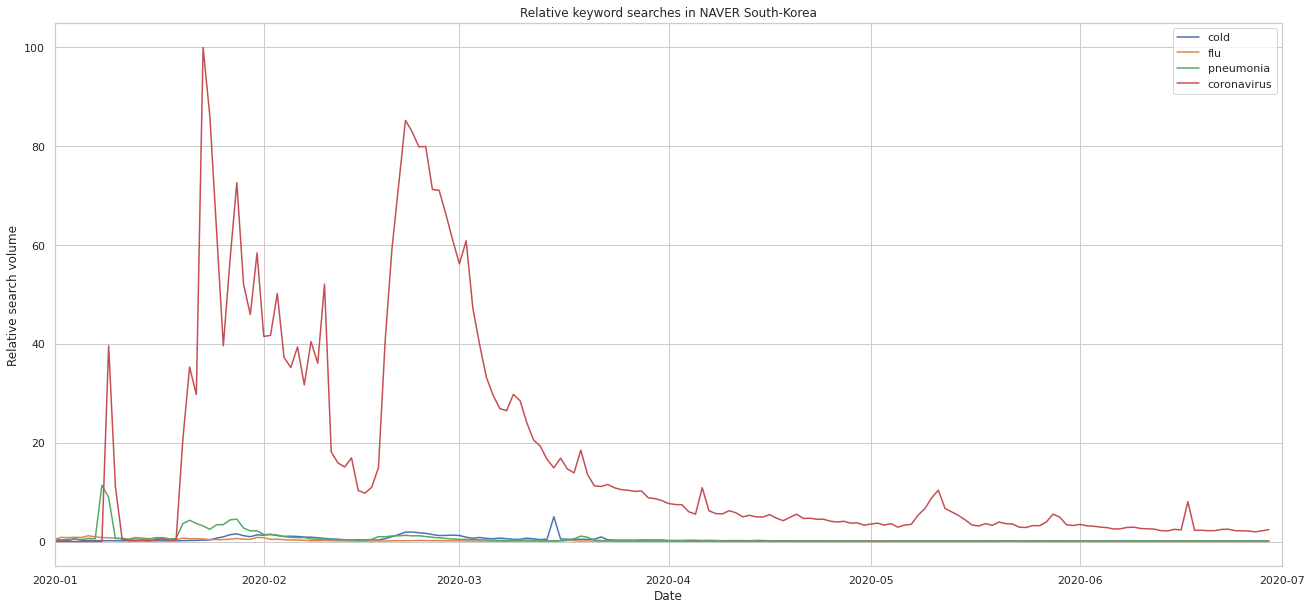

In [ ]:
# Plot search_trend
plt.figure(figsize=(22,10))
plt.plot(search_trend)

# Set axis settings and labels
plt.ylabel('Relative search volume');
plt.xlabel('Date');
plt.title('Relative keyword searches in NAVER South-Korea')
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-07-01")))


# show a legend on the plot
plt.legend(labels=['cold', 'flu', 'pneumonia', 'coronavirus'])

##### Provinces

In [ ]:
# Select columns from region df
region_province = region[['province','city','elementary_school_count','kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count']]

In [ ]:
# Merge with weather
province = region_province.merge(weather_grouped, how='left', on=['province'])

In [ ]:
# Check province df
province.head()

,province,city,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,Seoul,Seoul,607,830,48,1.44,15.38,5.8,22739,10000.0,13.0,8.8,18.0,1.4,4.5,210.3,57.7
1,Seoul,Gangnam-gu,33,38,0,4.18,13.17,4.3,3088,10000.0,13.0,8.8,18.0,1.4,4.5,210.3,57.7
2,Seoul,Gangdong-gu,27,32,0,1.54,14.55,5.4,1023,10000.0,13.0,8.8,18.0,1.4,4.5,210.3,57.7
3,Seoul,Gangbuk-gu,14,21,0,0.67,19.49,8.5,628,10000.0,13.0,8.8,18.0,1.4,4.5,210.3,57.7
4,Seoul,Gangseo-gu,36,56,1,1.17,14.39,5.7,1080,10000.0,13.0,8.8,18.0,1.4,4.5,210.3,57.7


In [ ]:
# Drop korea because it's the total
province = province[province.province != 'Korea']

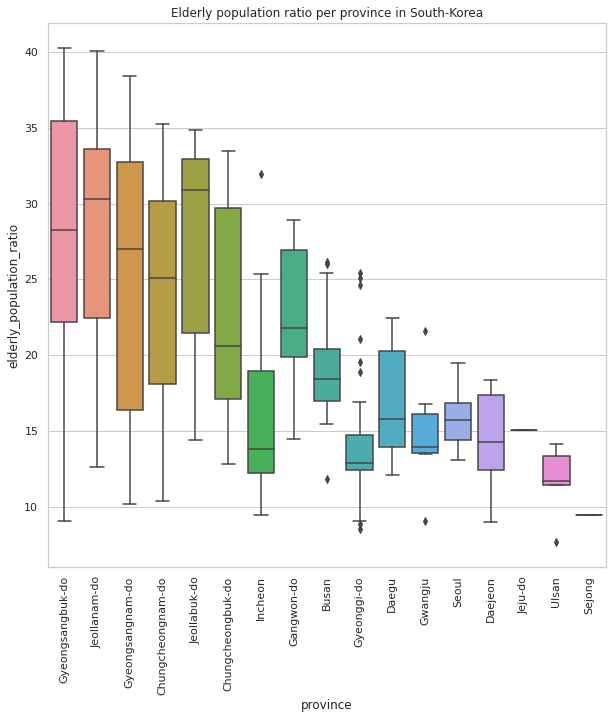

In [ ]:
# Plot the elderly population ratio per province
plt.figure(figsize=(10,10))

province_sorted = province[['province', 'elderly_population_ratio']].sort_values(by='elderly_population_ratio', ascending=False)
sns.set(style="whitegrid")

sns.boxplot(data=province_sorted, x='province', y='elderly_population_ratio')
plt.xticks(rotation=90)
plt.title('Elderly population ratio per province in South-Korea')

plt.show()

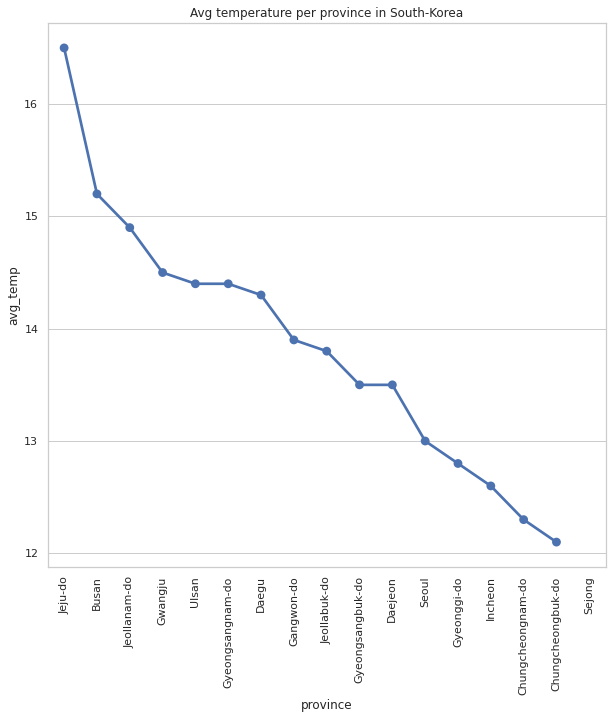

In [ ]:
# Plot the avg temp per province
plt.figure(figsize=(10,10))

province_sorted_temp = province[['province', 'avg_temp']].sort_values(by='avg_temp', ascending=False)
sns.set(style="whitegrid")

sns.pointplot(data=province_sorted_temp, x='province', y='avg_temp')
plt.xticks(rotation=90)
plt.title('Avg temperature per province in South-Korea')

plt.show()

In [ ]:
# Groupby province
province_df = province.groupby(['province']).mean().round(1)

In [ ]:
# Get the mean, median and standard deviation for the variables
province_df.agg(['mean', 'std', 'median']).T

,mean,std,median
elementary_school_count,51.558824,18.886439,48.00
kindergarten_count,73.376471,26.891205,66.70
university_count,2.900000,1.213981,2.60
academy_ratio,1.417647,0.414179,1.40
elderly_population_ratio,19.194118,5.894009,17.00
elderly_alone_ratio,9.529412,4.158690,8.00
nursing_home_count,762.958824,411.748625,600.30
code,32125.000000,20978.957712,25000.00
avg_temp,13.856250,1.162737,13.85
min_temp,9.656250,1.809961,9.40


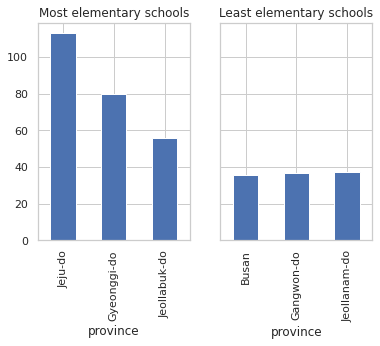

In [ ]:
# Plot provinces with most/least elementary schools
fig, ax = plt.subplots(1, 2, sharey=True)

province_df.elementary_school_count.nlargest(3).plot(kind='bar', ax=ax[0])
province_df.elementary_school_count.nsmallest(3).plot(kind='bar', ax=ax[1])

ax[0].set_title('Most elementary schools')
ax[1].set_title('Least elementary schools')
plt.show()

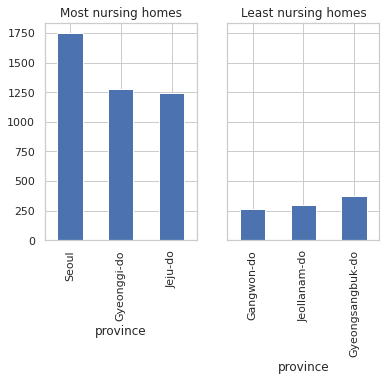

In [ ]:
# Plot provinces with most/least nursing homes
fig, ax = plt.subplots(1, 2, sharey=True)

province_df.nursing_home_count.nlargest(3).plot(kind='bar', ax=ax[0])
province_df.nursing_home_count.nsmallest(3).plot(kind='bar', ax=ax[1])

ax[0].set_title('Most nursing homes')
ax[1].set_title('Least nursing homes')
plt.show()

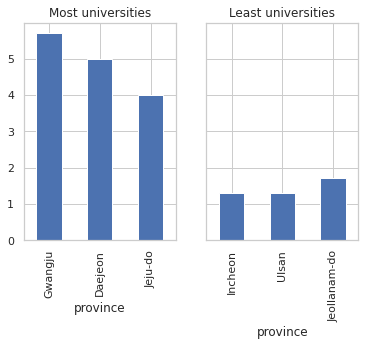

In [ ]:
# Plot provinces with most/least universities
fig, ax = plt.subplots(1, 2, sharey=True)

province_df.university_count.nlargest(3).plot(kind='bar', ax=ax[0])
province_df.university_count.nsmallest(3).plot(kind='bar', ax=ax[1])

ax[0].set_title('Most universities')
ax[1].set_title('Least universities')
plt.show()

##### Patients

In [ ]:
# Get aggregated states
agg = patient[['state','patient_id']].groupby('state').count().reset_index().sort_values(by = 'patient_id')

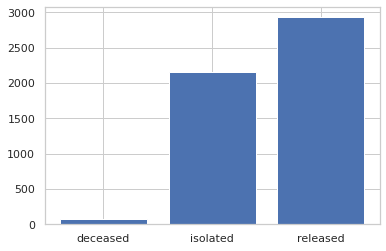

In [ ]:
# Plot the aggregated states
plt.bar(x=list(agg['state']), height=list(agg['patient_id']))
plt.show()

In [ ]:
# Drop NaN
patient.dropna(subset=['infection_case'], inplace=True)

In [ ]:
# Aggregate/group some infection cases
patient.loc[patient['infection_case'].str.contains('church', case=False), 'infection_case'] = 'church'
patient.loc[patient['infection_case'].str.contains('nursing home', case=False), 'infection_case'] = 'nursing home'
patient.loc[patient['infection_case'].str.contains('hospital', case=False), 'infection_case'] = 'hospital'
patient.loc[patient['infection_case'].str.contains('gym', case=False), 'infection_case'] = 'gym'
patient.loc[patient['infection_case'].str.contains('town', case=False), 'infection_case'] = 'town'
patient.loc[patient['infection_case'].str.contains('center', case=False), 'infection_case'] = 'center'
patient.loc[patient['infection_case'].str.contains('club', case=False), 'infection_case'] = 'club'

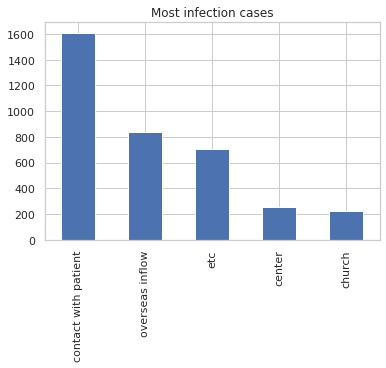

In [ ]:
# Plot infection cases
patient.infection_case.value_counts().nlargest(5).plot(kind='bar')
plt.title('Most infection cases')
plt.show()

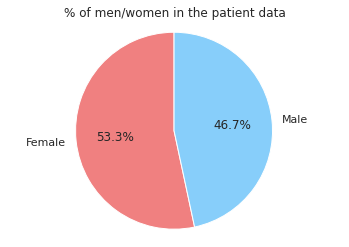

In [ ]:
# Get % of gender
sizes = patient.sex.value_counts(normalize=True).tolist()

# Pie chart
labels = 'Female', 'Male'

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.axis('equal') 
plt.title('% of men/women in the patient data', loc='center')

plt.show()

In [ ]:
# Get gender counts per state
gender = patient.groupby('sex')
gender.state.value_counts()

sex     state   
female  released    997
        isolated    704
        deceased     12
male    released    875
        isolated    600
        deceased     23
Name: state, dtype: int64

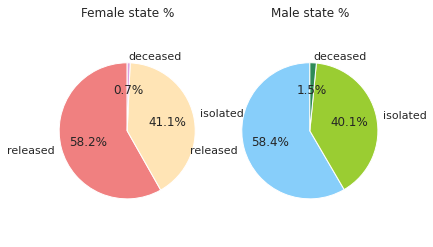

In [ ]:
# Set counts per state in list
states_list = gender.state.value_counts(normalize=True).tolist()

# Pie chart
labels = 'released', 'isolated', 'deceased'
colors = ['lightcoral', 'moccasin', 'plum']
colors_male = ['lightskyblue', 'yellowgreen', 'seagreen']

fig, ax = plt.subplots(1, 2)
ax[0].pie(states_list[0:3], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[0].axis('equal') 
ax[0].set_title('Female state %')

ax[1].pie(states_list[3:6], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors_male)
ax[1].axis('equal') 
ax[1].set_title('Male state %')

plt.show()

#### Merging

In [ ]:
# Create full features DF
full_features_df = patient.merge(region, how='left', on=['province', 'city'])

In [ ]:
# Drop unneccesary columns
full_features_df.drop(columns=['patient_id', 'confirmed_date', 'contact_number', 'infected_by', 'latitude', 'longitude', 'code', 'deceased_date', 'symptom_onset_date', 'released_date'], inplace=True)

In [ ]:
# Reset index and view the head of full_features_df
full_features_df = full_features_df.reset_index(drop=True)
full_features_df.head()

,sex,age,country,province,city,infection_case,state,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,released,36.0,56.0,1.0,1.17,14.39,5.7,1080.0
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,released,23.0,31.0,1.0,0.70,16.65,6.9,689.0
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,released,13.0,17.0,3.0,1.71,18.27,6.8,668.0
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,released,22.0,24.0,2.0,1.83,14.05,4.9,929.0
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,released,29.0,49.0,6.0,1.02,16.15,6.0,729.0


In [ ]:
# Remove s' from age 
full_features_df['age'] = full_features_df['age'].str.replace('s', '')

# Set as float to handle NaN
full_features_df['age'] = full_features_df['age'].astype(float)

In [ ]:
# Check the info
full_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       3211 non-null   object 
 1   age                       2958 non-null   float64
 2   country                   4246 non-null   object 
 3   province                  4246 non-null   object 
 4   city                      4190 non-null   object 
 5   infection_case            4246 non-null   object 
 6   state                     4246 non-null   object 
 7   elementary_school_count   4085 non-null   float64
 8   kindergarten_count        4085 non-null   float64
 9   university_count          4085 non-null   float64
 10  academy_ratio             4085 non-null   float64
 11  elderly_population_ratio  4085 non-null   float64
 12  elderly_alone_ratio       4085 non-null   float64
 13  nursing_home_count        4085 non-null   float64
dtypes: float

In [ ]:
# Get the mean age per state
grouped_age = full_features_df.groupby('state').mean()
grouped_age.age

state
deceased    67.714286
isolated    40.740394
released    38.545259
Name: age, dtype: float64

In [ ]:
# Get the mean age per state
grouped_age

,age,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
state,,,,,,,,
deceased,67.714286,23.393939,37.030303,3.484848,1.185152,23.222121,11.875758,379.242424
isolated,40.740394,48.324510,84.629963,2.470619,1.500392,14.152594,6.028163,991.268925
released,38.545259,34.539991,51.870550,2.598243,1.523967,16.398978,7.257097,771.482663


In [ ]:
# Create dataframes for each state
deceased = full_features_df.query('state == "deceased"')
isolated = full_features_df.query('state == "isolated"')
released = full_features_df.query('state == "released"')

print(f'{deceased.shape}, {isolated.shape}, {released.shape}')

(36, 14), (1958, 14), (2252, 14)


In [ ]:
# Impute age based on age state mean
deceased.age = deceased.loc[:, 'age'].transform(lambda x: x.fillna(x.mean()))
isolated.age = isolated.loc[:, 'age'].transform(lambda x: x.fillna(x.mean()))
released.age = released.loc[:, 'age'].transform(lambda x: x.fillna(x.mean()))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# Create full_df dataframe again with imputed values
full_df = pd.concat([deceased, isolated, released])
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4246 entries, 12 to 4242
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       3211 non-null   object 
 1   age                       4246 non-null   float64
 2   country                   4246 non-null   object 
 3   province                  4246 non-null   object 
 4   city                      4190 non-null   object 
 5   infection_case            4246 non-null   object 
 6   state                     4246 non-null   object 
 7   elementary_school_count   4085 non-null   float64
 8   kindergarten_count        4085 non-null   float64
 9   university_count          4085 non-null   float64
 10  academy_ratio             4085 non-null   float64
 11  elderly_population_ratio  4085 non-null   float64
 12  elderly_alone_ratio       4085 non-null   float64
 13  nursing_home_count        4085 non-null   float64
dtypes: floa

In [ ]:
# Drop NaN values
full_df.dropna(subset=['sex', 'age', 'country', 'province', 'city', 'infection_case', 'elementary_school_count', 'kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count'], inplace=True)
full_df = full_df.reset_index(drop=True)

# Check info
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       3080 non-null   object 
 1   age                       3080 non-null   float64
 2   country                   3080 non-null   object 
 3   province                  3080 non-null   object 
 4   city                      3080 non-null   object 
 5   infection_case            3080 non-null   object 
 6   state                     3080 non-null   object 
 7   elementary_school_count   3080 non-null   float64
 8   kindergarten_count        3080 non-null   float64
 9   university_count          3080 non-null   float64
 10  academy_ratio             3080 non-null   float64
 11  elderly_population_ratio  3080 non-null   float64
 12  elderly_alone_ratio       3080 non-null   float64
 13  nursing_home_count        3080 non-null   float64
dtypes: float

In [ ]:
# Check distribution states
full_df.state.value_counts()

released    1792
isolated    1256
deceased      32
Name: state, dtype: int64

In [ ]:
# Check distribution gender
full_df.sex.value_counts()

female    1653
male      1427
Name: sex, dtype: int64

In [ ]:
# Check distribution provinces
full_df.province.value_counts()

Gyeonggi-do          828
Seoul                542
Gyeongsangbuk-do     539
Incheon              333
Chungcheongnam-do    167
Busan                139
Gyeongsangnam-do     129
Daejeon              118
Gangwon-do            63
Chungcheongbuk-do     56
Ulsan                 53
Sejong                50
Jeollabuk-do          18
Daegu                 17
Jeollanam-do          14
Jeju-do               14
Name: province, dtype: int64

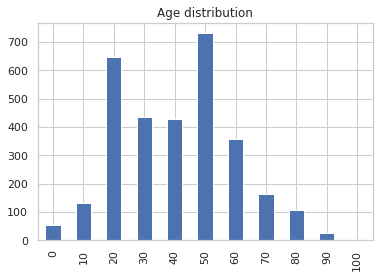

In [ ]:
# Function for rounding to nearest 10th
def roundup(num):
    return int(math.ceil(num / 10.0)) * 10


# Round all ages in full_df.age
empty_list = []
for number in full_df.age:
  empty_list.append(roundup(number))


# df with rounded age
df_rounded = pd.DataFrame(data=empty_list, columns=['age'])

# Plot age distribution
df_rounded.age.value_counts().sort_index().plot(kind='bar')

plt.title('Age distribution')
plt.show()

### Statistical testing

I am interested to know if there is a difference in the number of deceased men vs. the number of deceased women. In order to do this I will be using an **independent samples t-test**, which basically compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

I could also use a **z-test** because the sample size satisfies `n>30`, but the t-test is in my opinion the more correct one to use, since you can never really know the population standard deviation. 

Before we test the significance, let's specify our hypotheses:


*   H0: There is no difference between the female mean deceased sample and the male mean deceased sample.
*   HA: There is a difference between the female mean deceased sample and the male mean deceased sample.

Let's set `α=95%` confidence level, this suggests that we can reject the H0 hypothesis when our P-value is less than or equal to `0.05`. I chose 95% instead of 99% because eventhough you have more chance of being wrong, it is good enough to inferences and this also ensures stability in the results when one would repeat this experiment.


In [ ]:
# pip install researchpy

In [ ]:
# Set gender_patients as df and dorp any NaN values
gender_patient = patient.dropna(subset=['state'])

In [ ]:
# Get the totals
totals_gender = gender_patient.sex.value_counts()
totals_gender

female    1713
male      1498
Name: sex, dtype: int64

In [ ]:
# Groupby sex and count state values
gender = gender_patient.groupby('sex')
totals_gender_state = gender.state.value_counts()
totals_gender_state

sex     state   
female  released    997
        isolated    704
        deceased     12
male    released    875
        isolated    600
        deceased     23
Name: state, dtype: int64

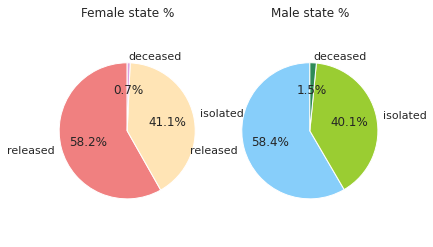

In [ ]:
# Pie chart
labels = 'released', 'isolated', 'deceased'
colors = ['lightcoral', 'moccasin', 'plum']
colors_male = ['lightskyblue', 'yellowgreen', 'seagreen']

fig, ax = plt.subplots(1, 2)
ax[0].pie(totals_gender_state[0:3], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[0].axis('equal') 
ax[0].set_title('Female state %')

ax[1].pie(totals_gender_state[3:6], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors_male)
ax[1].axis('equal') 
ax[1].set_title('Male state %')

plt.show()

In [ ]:
# Create dataframe
data_gender = {'sex': ['female', 'male'], 'released': [1402, 1112], 'isolated': [788, 666], 'deceased': [28, 47], 'n': [2218, 1825]}
gender_df = pd.DataFrame(data=data_gender)

# Add proportion deceased
gender_df['mean_deceased'] = gender_df['deceased'] /gender_df['n']

# View
gender_df

,sex,released,isolated,deceased,n,mean_deceased
0,female,1402,788,28,2218,0.012624
1,male,1112,666,47,1825,0.025753


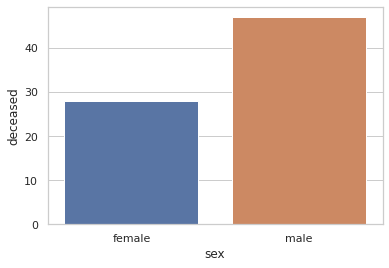

In [ ]:
# Boxplot
sns.barplot(data=gender_df, x='sex', y='deceased')

We can verify the `mean_deceased` with the researchpy library. In order to do that we first have to change the value of state to numeric. 

In [ ]:
# Change state deceased to 1, rest to 0
gender_patient.loc[gender_patient['state'].str.contains('deceased', case=False), 'state'] = '1'
gender_patient.loc[gender_patient['state'].str.contains('isolated', case=False), 'state'] = '0'
gender_patient.loc[gender_patient['state'].str.contains('released', case=False), 'state'] = '0'

In [ ]:
# Set as int so it is now numeric
gender_patient.state = gender_patient.state.astype(int)

In [ ]:
import researchpy as rp

# Check mean, sd, n and ci
rp.summary_cont(gender_patient['state'].groupby(gender_patient['sex']))

,N,Mean,SD,SE,95% Conf.,Interval
sex,,,,,,
female,1713,0.0070,0.0834,0.0020,0.0031,0.0110
male,1498,0.0154,0.1230,0.0032,0.0091,0.0216


Here we have the same outcome as when we calculate it ourselves! Now we can run the independent samples t-test for the result:

In [ ]:
# Run t-test and prints test statistic, p-value and df
ttest = sm.stats.ttest_ind(gender_patient[gender_patient['sex'] == 'female'].state, gender_patient[gender_patient['sex'] == 'male'].state)
print(ttest) 

(-2.274081105409179, 0.023026864131165434, 3209.0)


As we can see, with a p-value of `0.002` we can reject `H0` since `0.002 < 0.05`. This means that there is evidence at the 95% confidence level to assume that the proportion of female/male deceased patients is statistically different.

In [ ]:
# As a means of comparison, let's run the ztest
ztest = sm.stats.ztest(gender_patient[gender_patient['sex'] == 'female'].state, gender_patient[gender_patient['sex'] == 'male'].state)
print(ztest) 

(-2.27408110540918, 0.022961110509754416)


In [ ]:
# Create dataframe
data_tests = {'test': ['t-test', 'z-test'], 'p-value': [ttest[1], ztest[1]], 'test-statistic': [ttest[0], ztest[0]], 'population': ['sd not known', 'sd known']}
tests_df = pd.DataFrame(data=data_tests)

# View
tests_df

,test,p-value,test-statistic,population
0,t-test,0.023027,-2.274081,sd not known
1,z-test,0.022961,-2.274081,sd known


### Modeling

#### PCA

In [ ]:
# Leave out state
features = ['elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count']
       
# Separating out the features
x = full_df.loc[:, features].values

# Separating out the target
y = full_df.loc[:,['state']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
# Visualise the standardised data (Just for simplicity)
see_x = pd.DataFrame(data=x, columns=features)
see_x.head()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,-1.153909,-1.105194,0.134567,0.332186,0.417772,-0.079591,-0.254035
1,-0.789633,-0.953647,-0.282401,0.542250,-0.286058,-0.558577,0.182914
2,-0.384882,-0.542306,0.134567,0.174638,0.541192,0.399395,0.278339
3,-0.384882,-0.542306,0.134567,0.174638,0.541192,0.399395,0.278339
4,-0.101556,0.215427,0.134567,0.507239,-0.619626,-0.558577,0.507695


In [ ]:
# While applying StandardScaler, each feature of your data should be normally 
# distributed such that it will scale the distribution to a mean of zero
# and a standard deviation of one.
np.mean(x),np.std(x)

(2.372869989551355e-17, 1.0)

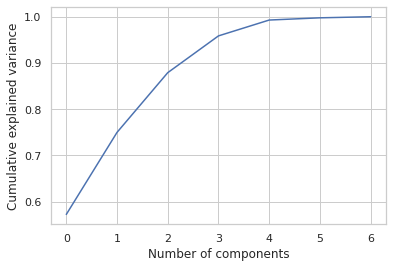

In [ ]:
# Plot the explained variance per component added
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [ ]:
# 2 PCA components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
# Check the head()
principal_df.head()

,principal component 1,principal component 2
0,1.055859,0.781914
1,0.220503,1.352708
2,0.572342,0.045917
3,0.572342,0.045917
4,-0.919429,0.554400


In [ ]:
# Concatenate and view head()
final_df_pca = pd.concat([principal_df[['principal component 1', 'principal component 2']], full_df[['state']]], axis = 1)
final_df_pca.head()

,principal component 1,principal component 2,state
0,1.055859,0.781914,deceased
1,0.220503,1.352708,deceased
2,0.572342,0.045917,deceased
3,0.572342,0.045917,deceased
4,-0.919429,0.554400,deceased


<Figure size 720x720 with 0 Axes>

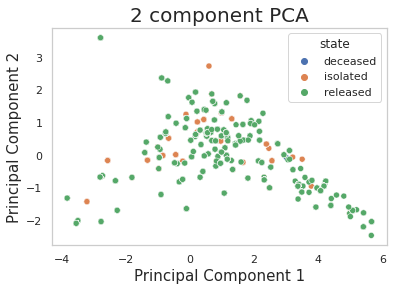

In [ ]:
# Scatterplot 
fig = plt.figure(figsize = (10,10))

fig, ax = plt.subplots()

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

sns.scatterplot(x=final_df_pca['principal component 1'], y=final_df_pca['principal component 2'], hue=final_df_pca.state)

ax.grid()

In [ ]:
# Explained variance of the components
pca.explained_variance_ratio_

array([0.57229201, 0.17748348])

#### T-SNE

In [ ]:
# Initialise T-SNE and set 2 components
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
# Feed the features dataset 
tsne_obj= tsne.fit_transform(x)

In [ ]:
# View the head()
tsne_df = pd.DataFrame(data = tsne_obj
             , columns = ['X', 'Y'])

tsne_df.head()

,X,Y
0,7.317872,16.073278
1,12.674182,27.831255
2,13.054370,18.431116
3,13.054367,18.431164
4,-54.552574,-11.377718


In [ ]:
# Concatenate and view again
final_tsne_df = pd.concat([tsne_df, full_df[['state']]], axis = 1)
final_tsne_df.head()

,X,Y,state
0,7.317872,16.073278,deceased
1,12.674182,27.831255,deceased
2,13.054370,18.431116,deceased
3,13.054367,18.431164,deceased
4,-54.552574,-11.377718,deceased


<Figure size 576x576 with 0 Axes>

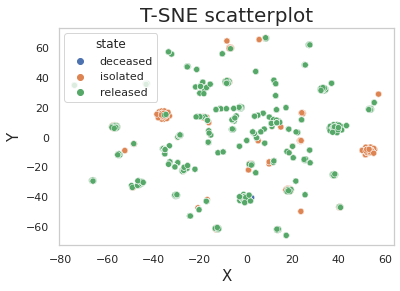

In [ ]:
# T-SNE scatterplot
fig = plt.figure(figsize = (8,8))

fig, ax = plt.subplots()

ax.set_xlabel('X', fontsize = 15)
ax.set_ylabel('Y', fontsize = 15)
ax.set_title('T-SNE scatterplot', fontsize = 20)

sns.scatterplot(x="X", y="Y", hue="state", data=final_tsne_df);
ax.grid()

#### Kmeans clustering

In [ ]:
# Calculate the within cluster SSE (distortion)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principal_df)
    distortions.append(kmeanModel.inertia_)

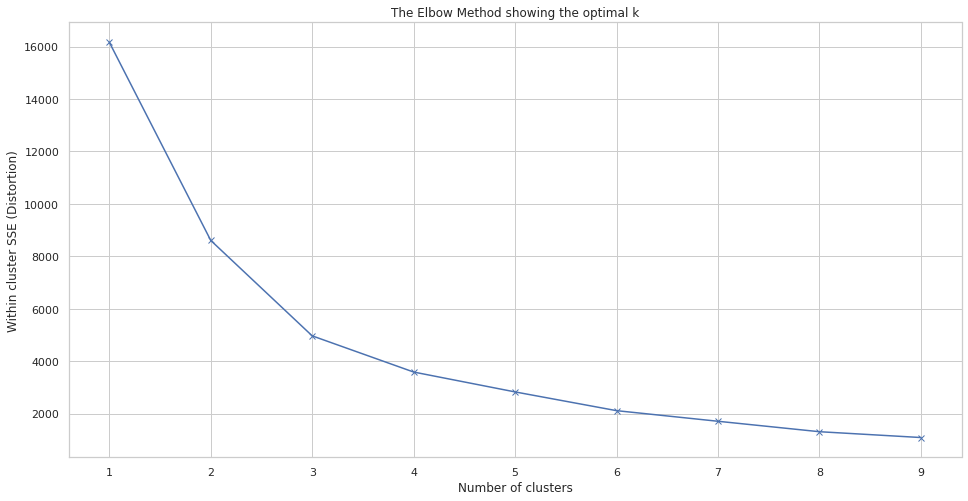

In [ ]:
# Plot the elbow figure
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster SSE (Distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
pip install kneed

In [ ]:
# Installing kneed
from kneed import DataGenerator, KneeLocator

In [ ]:
# Using kneed to programmatically check elbow point
kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
# Fit and predict the Kmeans model
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(principal_df)
y_kmeans = kmeanModel.predict(principal_df)

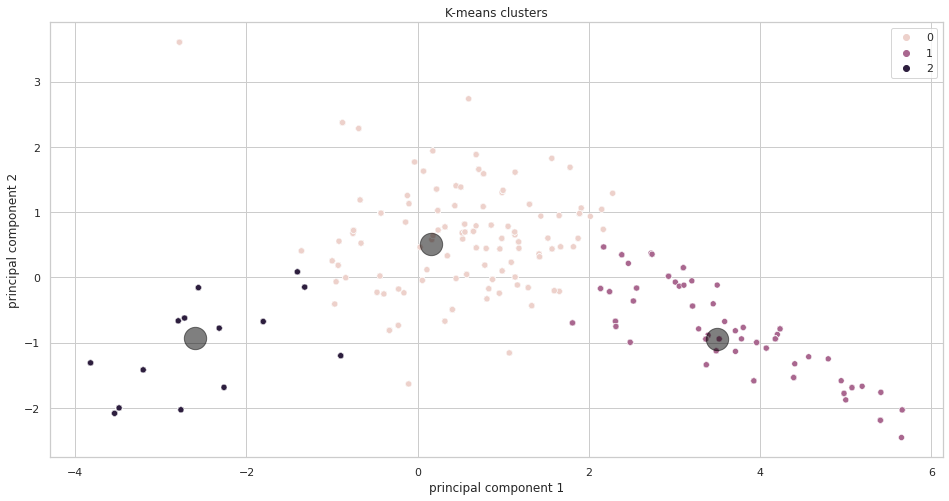

In [ ]:
# plot points
plt.figure(figsize=(16,8))
plt.title('K-means clusters')

sns.scatterplot(data=principal_df, x='principal component 1', y='principal component 2', hue=y_kmeans)


# plot cluster centers
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

In [ ]:
# Add column for cluster labels
full_df['cluster'] = kmeanModel.labels_

In [ ]:
# change clusters to 1 - 3 instead of 0 - 2
full_df['cluster'] = full_df['cluster'].map({0:1, 1:2, 2:3}) 

In [ ]:
# Group by cluster
grouped_by_cluster = full_df.groupby('cluster')

In [ ]:
# Get the percentages of states in each cluster
df = pd.concat([grouped_by_cluster.state.value_counts(), 
                grouped_by_cluster.state.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

df.round(2)

counts  percentage
cluster state                       
1       released    1258       63.25
        isolated     714       35.90
        deceased      17        0.85
2       released     302       72.60
        isolated      99       23.80
        deceased      15        3.61
3       isolated     443       65.63
        released     232       34.37

Seems like the highest percentage of deceased patients are in cluster 1, but the highest absolute number of deceased patients is in cluster 2. Let's have a closer look at the data

In [ ]:
# See means
grouped_by_cluster.mean()

,age,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
cluster,,,,,,,,
1,40.462996,32.991453,53.124183,2.360483,1.541368,14.276461,5.961287,720.495726
2,44.398661,18.278846,22.528846,1.014423,0.934231,28.547428,15.876442,154.507212
3,35.007407,80.924444,140.082963,4.635556,1.819126,12.274089,5.118222,1522.165926


It seems that cluster 1 has a higher percentage of `elderly_population_ratio` and `elderly_alone_ratio` compared to the other 2 clusters. The cluster also has the lowest number of nursing homes compared to the other 2 clusters and the highest average age.

#### linear regression

In [ ]:
# Add categorised values
full_df['state_cat'] = full_df['state'].astype('category').cat.codes

In [ ]:
# Get all interesting features for linear regression
features_lin = ['age','sex', 'infection_case', 'country', 'province', 'city', 'elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count']

In [ ]:
# Set X as df
X = full_df[features_lin]

In [ ]:
# Set dummy variables
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,age,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,sex_male,infection_case_Changnyeong Coin Karaoke,infection_case_KB Life Insurance,infection_case_Milal Shelter,infection_case_Ministry of Oceans and Fisheries,infection_case_Pilgrimage to Israel,infection_case_Richway,infection_case_Samsung Fire & Marine Insurance,infection_case_Seongdong-gu APT,infection_case_Seoul City Hall Station safety worker,infection_case_Suyeong-gu Kindergarten,infection_case_center,infection_case_church,infection_case_club,infection_case_contact with patient,infection_case_etc,infection_case_gym,infection_case_hospital,infection_case_nursing home,infection_case_overseas inflow,infection_case_town,country_Canada,country_China,country_Foreign,country_France,country_Germany,country_Indonesia,country_Korea,country_Mongolia,country_Spain,country_Switzerland,country_Thailand,...,city_Sejong,city_Seo-gu,city_Seocheon-gun,city_Seocho-gu,city_Seodaemun-gu,city_Seongbuk-gu,city_Seongdong-gu,city_Seongju-gun,city_Seongnam-si,city_Seosan-si,city_Siheung-si,city_Sokcho-si,city_Songpa-gu,city_Suncheon-si,city_Suseong-gu,city_Suwon-si,city_Suyeong-gu,city_Taean-gun,city_Taebaek-si,city_Uijeongbu-si,city_Uiseong-gun,city_Uiwang-si,city_Ulju-gun,city_Wonju-si,city_Yangcheon-gu,city_Yangju-si,city_Yangsan-si,city_Yecheon-gun,city_Yeongcheon-si,city_Yeongdeok-gun,city_Yeongdeungpo-gu,city_Yeongju-si,city_Yeongwol-gun,city_Yeongyang-gun,city_Yeonje-gu,city_Yeonsu-gu,city_Yeosu-si,city_Yongin-si,city_Yongsan-gu,city_Yuseong-gu
0,80.0,13.0,17.0,3.0,1.71,18.27,6.8,668.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40.0,22.0,24.0,2.0,1.83,14.05,4.9,929.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,70.0,32.0,43.0,3.0,1.62,19.01,8.7,986.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70.0,32.0,43.0,3.0,1.62,19.01,8.7,986.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70.0,39.0,78.0,3.0,1.81,12.05,4.9,1123.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Set all columns incl dummy variables as features_x
features_x = X.columns

In [ ]:
# X = StandardScaler().fit_transform(X)

y = full_df[['state_cat']]

In [ ]:
# Set train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit linear regression
model_lin = LinearRegression().fit(X_train,y_train)

In [ ]:
# Predictions
predictions = model_lin.predict(X_test)

In [ ]:
# Get summary
X_train_Sm= sm.add_constant(X_train)
X_test_Sm= sm.add_constant(X_test)
ls=sm.OLS(y_test,X_test_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              state_cat   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     9.531
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           3.71e-79
Time:                        22:06:28   Log-Likelihood:                -32.747
No. Observations:                 616   AIC:                             365.5
Df Residuals:                     466   BIC:                             1029.
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
# Map the states
mapped_states = dict( enumerate(full_df['state'].astype('category').cat.categories))

In [ ]:
# Set prediction as dataframe
predicted_df = pd.DataFrame(predictions.astype('int'), columns=['predicted'])

In [ ]:
# Add the predicted state
predicted_df['predicted_state'] = predicted_df['predicted'].map(mapped_states)
predicted_df.head()

,predicted,predicted_state
0,2,released
1,1,isolated
2,1,isolated
3,2,released
4,1,isolated


In [ ]:
# Reset the index for y_test
y_test = y_test.reset_index(drop=True)
y_test.head()

,state_cat
0,2
1,2
2,2
3,2
4,2


In [ ]:
# Check with actual state
predicted_final_df = pd.concat([predicted_df, y_test[['state_cat']]], axis=1)
predicted_final_df.tail()

,predicted,predicted_state,state_cat
611,1,isolated,2
612,0,deceased,1
613,2,released,2
614,1,isolated,1
615,1,isolated,1


In [ ]:
# Add the mapped states
predicted_final_df['state'] = predicted_final_df['state_cat'].map(mapped_states)

In [ ]:
# Check predicted_final_df
predicted_final_df.tail()

,predicted,predicted_state,state_cat,state
611,1,isolated,2,released
612,0,deceased,1,isolated
613,2,released,2,released
614,1,isolated,1,isolated
615,1,isolated,1,isolated


In [ ]:
# Count values
predicted_counts = pd.DataFrame(predicted_final_df.state.value_counts())
predicted_counts['predicted'] = predicted_final_df.predicted_state.value_counts()

predicted_counts

,state,predicted
released,374,112
isolated,235,440
deceased,7,64


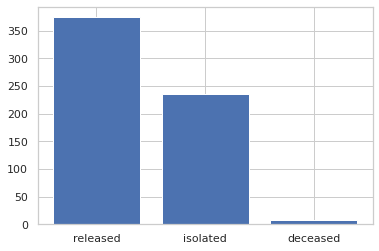

In [ ]:
# Plot the actual situation
states = ['released', 'isolated', 'deceased']

actual = [374, 235, 7]
predicted = [108, 443, 65]

plt.bar(states, actual)
plt.show()

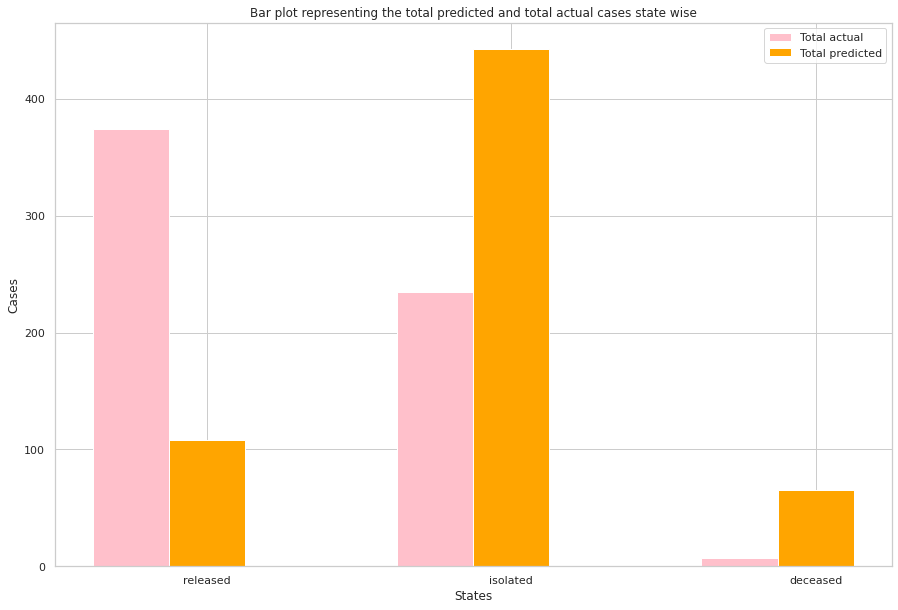

In [ ]:
# Plot the difference between actual and predicted
plt.figure(figsize=[15, 10])

X = np.arange(len(actual))
plt.bar(X, actual, color = 'pink', width = 0.25)
plt.bar(X + 0.25, predicted, color = 'orange', width = 0.25)


plt.legend(['Total actual', 'Total predicted'])
plt.xticks([i + 0.25 for i in range(3)], states)
plt.title("Bar plot representing the total predicted and total actual cases state wise")

plt.xlabel('States')
plt.ylabel('Cases')
plt.show()